$$\require{mhchem}$$       

- You are welcome to turn in work for the mechanism derivation on a separate sheet of paper for a small penalty (2 pt). Please do so by taking a photo of the pages and uploading them to the same Box folder.  Also hand in the physical sheet of paper.
- Label the x/y axis of graphs (and legend if appropriate)
- Comment your code so we understand what you're doing
- 'print' your identified solutions / fitted constants with units

# Reverse water gas shift catalysis

The reverse water gas shift reaction (rWGS) has been proposed as a way of turning waste CO$_2$ into carbon monoxide, which can be further hydrogenated to liquid fuels.  This reaction is as follows in the gas phase:
\begin{align}
\ce{CO2 + H2 <=> CO + H2O}
\end{align}
The reverse water gas shift reaction is usually conducted on CuO/ZnO catalysts supported by alumina, but a group in literature suggested that a TiO$_2$ supported Pt catalyst might be more active.  You're going to help them estimate a reduced mechanism for this catalytic reaction.

##  [20 pt] The authors propose the following associative elementary reaction mechanism: 
\begin{align*}
\ce{CO2(g) + S &<=>[K_{1}] CO2*S}\\
\ce{H2(g) + S &<=>[K_{2}] H2\cdot S}\\
\ce{CO2\cdot S + H2 \cdot S &<=>[K_{eq}] CO\cdot S + H2O \cdot S}\\
\ce{CO \cdot S &<=>[K_{4}] CO(g) + S}\\
\ce{H2O \cdot S &<=>[K_{5}] H2O(g) + S}
\end{align*}
Assuming that the third step ($\ce{CO2\cdot S + H2 \cdot S <=> CO\cdot S + H2O \cdot S\:}$) is rate limiting, derive the apparent reaction rate law for the this mechanism at short time conditions, where $[CO]$, $[H_2O]$, $[CO\cdot S]$, and $[H_2O\cdot S]$ are all ~0.  This is a heterogeneous catalytic process, so the total number of surface sites is conserved.

Suppose that the total concentration of surface sites is $C_{S0}$.

- A = 'CO2'
- B = 'H2'
- C = 'CO'
- D = 'H2O'
- E = 'S'
- F = 'CO2.S'
- G = 'H2.S'
- H = 'CO.S'
- I = 'H2O.S'

\begin{align*}
    r_1 &= k_1 (C_A C_E - C_F / K_1) \\
    r_2 &= k_2 (C_B C_E - C_G / K_2 ) \\
    r_3 &= k_{eq} (C_F C_G - C_H C_I / K_{eq}) \\
    r_4 &= k_4 (C_H - C_C C_E / K_4) \\
    r_5 &= k_5 (C_I - C_D C_E / K_5)
\end{align*}

\begin{align*}
    C_{S0} = C_E + C_F + C_G + C_H + C_I
\end{align*}

\begin{align*}
    r_1 = 0 \Rightarrow
    C_F = K_1 C_A C_E \\
    r_2 = 0 \Rightarrow
    C_G = K_2 C_B C_E \\
    r_4 = 0 \Rightarrow
    C_H = C_C C_E/K_4 \\
    r_5 = 0 \Rightarrow
    C_I = C_D C_E / K_5 \\
\end{align*}

\begin{align*}
    C_E = \frac {C_{S0}} {1 + K_1 C_A + K_2 C_B + C_C/K_4 + C_D / K_5}
\end{align*}

\begin{align*}
    r = r_3 &= k_{eq} (C_F C_G - C_H C_I / K_{eq}) \\
    &= k_{eq} C_E^2 (K_1 C_A \cdot K_2 C_B - C_C C_D / (K_4 K_5 K_eq)) \\
    &= \frac {k_{eq} C_{S0}^2 (K_1 K_2 C_A C_B - C_C C_D / (K_4 K_5 K_eq))} {(1 + K_1 C_A + K_2 C_B + C_C/K_4 + C_D / K_5) ^ 2}
\end{align*}

Since $[CO]$, $[H_2O]$, $[CO\cdot S]$, and $[H_2O\cdot S]$ are all ~0, $C_C = C_D = 0$.
\begin{align*}
    r &= \frac {k_{eq} C_{S0}^2 K_1 K_2 C_A C_B} {(1 + K_1 C_A + K_2 C_B) ^ 2}
\end{align*}

Great, but it is confusing to rename everything to A,B,C,D, etc.  This should not be done to avoid confusion.

19/20

\begin{align*}
    r &= \frac {k_{eq} C_{S0}^2 K_1 K_2 C_{CO_2} C_{H_2}} {(1 + K_1 C_{CO_2} + K_2 C_{CO_2}) ^ 2}
\end{align*}

## [20 pt] We can assume simplified Langmuir Hinshelwood kinetics of the form: 
\begin{align*}
r=\frac{kP_{CO2}P_{H_2}}{(1+K_1P_{CO2}+K_2P_{H_2})^2}
\end{align*}
where $K_1$ is already known from other studies:  0.07/atm. Use this simplified Langmuir Hinshelwood rate law to fit values of $k$ and $K_2$ for the following data:

| $P_{CO_2}$[atm] | $P_{H_2}$[atm] | Rate [mol/h/gcat] |
|----------:|---------:|------------------:|
|       0.9 |     0.18 |              0.037 |
|       0.9 |     0.42 |              0.045 |
|       0.9 |      0.6 |              0.046 |
|       0.9 |     0.85 |              0.051 |
|       0.9 |     0.92 |             0.0525 |
In addition to finding $k,K_2$, also plot your fit with the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [25]:
np.set_printoptions(precision=5)
from pycse import nlinfit

r = np.array([0.037, 0.045, 0.046, 0.051, 0.0525])
lnr = np.log(r)

PCO2 = np.array([0.9, 0.9, 0.9, 0.9, 0.9])
PH2 = np.array([0.18, 0.42, 0.6, 0.85, 0.92])

P = np.array([[0.9, 0.9, 0.9, 0.9, 0.9], [0.18, 0.42, 0.6, 0.85, 0.92]])

K1 = 0.07 # 1/atm

def func(P, k, K2):
    PCO2, PH2 = P
    return k * PCO2 * PH2 / (1 + K1 * PCO2 + K2 * PH2) ** 2

initial_guess = [1.2, 0.03]
alpha = 0.05
pars, pint, se = nlinfit(func, P, r, initial_guess, alpha)
k, K2 = np.array(pars)

print('k = {:1.5f} mol/h/gcat/atm^2, K2 = {:1.3f} 1/atm'.format(k, K2))

k = 0.37047 mol/h/gcat/atm^2, K2 = 1.554 1/atm


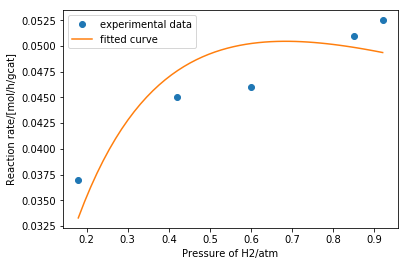

In [26]:
def func2(P):
    PCO2 = 0.9
    PH2 = P
    return k * PCO2 * PH2 / (1 + K1 * PCO2 + K2 * PH2) ** 2

Pspan = np.linspace(0.18, 0.92)
r2 = func2(Pspan)
plt.plot(PH2, r,'o', Pspan, r2)
plt.legend(['experimental data', 'fitted curve'])
plt.xlabel('Pressure of H2/atm')
plt.ylabel('Reaction rate/[mol/h/gcat]')
plt.show()

KT:  Experimental data should be plotted as points, not a line (-1). And the fitted curve should be smooth, not jagged (-1).

18/20

##  [15 pt] Now use the same data to fit a $k$ and $\alpha$ for a simple power law (below). 
\begin{align*}
r=k P_{CO2}^{0.831}P_{H2}^\alpha
\end{align*}
Plot your fit and the data.

\begin{align*}
    ln r = ln k + 0.831 ln P_{CO2} + \alpha ln P_{H_2}
\end{align*}

In [4]:
r = np.array([0.037, 0.045, 0.046, 0.051, 0.0525]).T
lnr = np.log(r)

PCO2 = np.array([0.9, 0.9, 0.9, 0.9, 0.9]).T
PH2 = np.array([0.18, 0.42, 0.6, 0.85, 0.92]).T
lnPCO2 = np.log(PCO2)
lnPH2 = np.log(PH2)

In [5]:
lnPH2

array([-1.7148 , -0.8675 , -0.51083, -0.16252, -0.08338])

In [6]:
lnrp = lnr - 0.831 * lnPCO2

In [28]:
A = np.array([[-1.7148 , -0.8675 , -0.51083, -0.16252, -0.08338], [1, 1, 1, 1, 1]]).T
ATA = np.matmul(A.T, A)
ATAp = np.linalg.inv(ATA)
Ap = np.matmul(ATAp, A.T) # pseudo-inverse

x = np.matmul(Ap, lnrp)
alpha, lnk = x
k = np.exp(lnk)
print('alpha = {:1.3f}, k = {:1.5f} mol/h/gcat/atm^{:1.3f}'.format(alpha, k, 0.831 + alpha))

alpha = 0.206, k = 0.05756 mol/h/gcat/atm^1.037


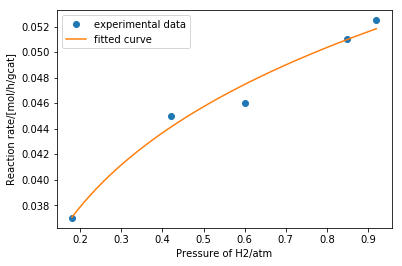

In [29]:
def func3(P):
    PCO2 = 0.9
    PH2 = P
    return k * PCO2 ** 0.831 * PH2 ** alpha

r3 = func3(Pspan)
plt.plot(PH2, r, 'o', Pspan, r3)
plt.legend(['experimental data', 'fitted curve'])
plt.xlabel('Pressure of H2/atm')
plt.ylabel('Reaction rate/[mol/h/gcat]')
plt.show()

KT:  Same feedback as before.

13.5/15.0

## [5 pt] Of the three rate laws (the one proposed in literature, the simplified Langmuir Hinshelwood, and the power law), which one would you use? Why? 

I would use the simiplified Langmuir Hinshelwood rate law because:

- It is a heterogeneous catalytic process, so taking the surface sites into account is important. The power law is out.
- It is hard to get the value of equilibrium constants and rate constants of reaction 3, 4, 5, which include adsorbed components.

So the simplified Langmuir Hinshelwood would be a nice choice.

KT:  Sound logic. I'd take a better look at the fits next time, though. The data seems to suggest otherwise.

4/5

## [40 pt] Under reverse water gas shift conditions, the experimental team found that  the experimental rate data could be approximated with
\begin{align}
r=k P_{CO2}^{0.831}P_{H2}^{0.201}
\end{align}
where $k=0.060$ [mol CO2 h$^{-1}$ $g_{cat}^{-1}$ atm$^{-1.032}$].  For simplicity, assume that there is only a forward rate of reaction (no reverse). Assuming a packed bed reactor with pressure drop ($\alpha=2\times 10^{-5}/g_{cat}$), plot the CO$_2$ and H$_2$ molar flow rates and the pressure profile for an inlet stream of 0.5 mol/s each of CO$_2$ and H$_2$ at a temperature of 573 K and a total pressure of 3.4 atm as a function of catalyst weight (up to 10,000 g). The reactor is isothermal and because the net change in mols for the reaction is 0, isobaric.

In [9]:
species = ['CO2', 'H2', 'CO', 'H2O'] # A, B, C, D

In [10]:
k = 0.060 / 3600 # mol CO2 / s / g_cat / atm ^ 1.032
alpha = 2e-5 # 1/g_cat
FA0 = FB0 = 0.5 # mol/s
T = 573 # K
Pt0 = 3.4 # atm
Wspan = np.linspace(0, 10000)
Ft = FA0 + FB0 # total molar flowrate

In [11]:
y0 = 1
F0 = np.array([FA0, FB0, 0, 0, y0]).T

def dFdW(F, W):
    FA, FB, FC, FD, y = F
    Pt = Pt0 * y
    
    yA, yB = F[0:2] / Ft # mole fraction
    # print(yA)
    PA = yA * Pt
    PB = yB * Pt
    # print(PA)
    r = k * PA ** 0.831 * PB ** 0.201
    
    dFAdW = dFBdW = -r
    dFCdW = dFDdW = r
    
    dydW = - alpha / (2 * y)
    # print(dydW)
    return [dFAdW, dFBdW, dFCdW, dFDdW, dydW]
    
    # units!!!!


In [12]:
F_PBR = odeint(dFdW, F0, Wspan)

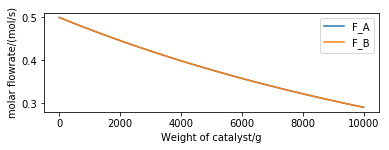

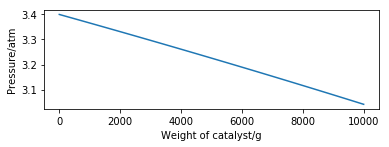

In [13]:
plt.subplot(2, 1, 1)
plt.plot(Wspan, F_PBR[:, 0:2])
plt.xlabel('Weight of catalyst/g')
plt.ylabel('molar flowrate/(mol/s)')
plt.legend(['F_A','F_B'])
plt.show()

plt.subplot(2, 1, 2)
plt.plot(Wspan, F_PBR[:, 4] * Pt0)
plt.xlabel('Weight of catalyst/g')
plt.ylabel('Pressure/atm')
plt.show()
#40